In [1]:
# # To unzip 
# from zipfile import ZipFile
# file_name = "/content/drive/MyDrive/Colab Notebooks/data_21012021.zip"
# with ZipFile(file_name, 'r') as zip:
#     zip.extractall()
#     print('done')


In [1]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.mobilenet import MobileNet
from keras.applications.mobilenet import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.callbacks import ModelCheckpoint
import numpy as np
from glob import glob
import matplotlib.pyplot as plt


In [13]:
# tf.config.experimental.list_physical_devices('GPU')physical_devices
# print("Num GPUS Available: ", len(physical_devices))
# tf.config.experimental.set_memory_growth(physical_devices[0], True)


In [14]:
IMAGE_SIZE = [224, 224]

train_path = 'D:/nitesh/trial modules/cnn/new/dataset/train'
valid_path = 'D:/nitesh/trial modules/cnn/new/dataset/test'


In [15]:
mnet = MobileNet(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [16]:
for layer in mnet.layers:
    layer.trainable = False


In [17]:
folders = glob('D:/nitesh/trial modules/cnn/new/dataset/train/*')

x = Flatten()(mnet.output)
prediction = Dense(len(folders), activation='softmax')(x)


In [18]:
model = Model(inputs=mnet.input, outputs=prediction)

model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 112, 112, 32)      0   

In [19]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [20]:
# checkpoint 1
filepath="model_mnet-{epoch:02d}-{val_accuracy:.3f}-{val_loss:.3f}.h5"
checkpoint = ModelCheckpoint(filepath, 
                             monitor='val_loss', 
                             verbose=1, 
                             save_best_only=True, 
                             mode='min')
callbacks_list = [checkpoint]


In [21]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   zoom_range = 0.1,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('D:/nitesh/trial modules/cnn/new/dataset/train/',
                                                 target_size = (224, 224),
                                                 batch_size = 64,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory('D:/nitesh/trial modules/cnn/new/dataset/test',
                                            target_size = (224, 224),
                                            batch_size = 64,
                                            class_mode = 'categorical')


Found 10901 images belonging to 6 classes.
Found 2698 images belonging to 6 classes.


In [22]:
r = model.fit_generator(
    training_set,
    validation_data = test_set,
    epochs = 25,
    steps_per_epoch = len(training_set),
    validation_steps = len(test_set),
    callbacks=callbacks_list
)


c:\users\admin\appdata\local\programs\python\python38\lib\site-packages\tensorflow\python\keras\engine\training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/25
171/171 [==============================] - 424s 2s/step - loss: 1.1097 - accuracy: 0.8707 - val_loss: 0.0464 - val_accuracy: 0.9893

Epoch 00001: val_loss improved from inf to 0.04642, saving model to model_mnet-01-0.989-0.046.h5
Epoch 2/25
171/171 [==============================] - 368s 2s/step - loss: 0.0802 - accuracy: 0.9869 - val_loss: 0.2981 - val_accuracy: 0.9626

Epoch 00002: val_loss did not improve from 0.04642
Epoch 3/25
171/171 [==============================] - 361s 2s/step - loss: 0.1303 - accuracy: 0.9847 - val_loss: 0.2291 - val_accuracy: 0.9766

Epoch 00003: val_loss did not improve from 0.04642
Epoch 4/25
171/171 [==============================] - 348s 2s/step - loss: 0.0438 - accuracy: 0.9935 - val_loss: 0.1175 - val_accuracy: 0.9859

Epoch 00004: val_loss did not improve from 0.04642
Epoch 5/25
171/171 [==============================] - 413s 2s/step - loss: 0.0795 - accuracy: 0.9908 - val_loss: 0.0789 - val_accuracy: 0.9885

Epoch 00005: val_loss did not 

In [23]:
!dir

 Volume in drive D has no label.
 Volume Serial Number is 867C-7071

 Directory of D:\nitesh\trial modules\cnn

12/23/2021  05:17 PM    <DIR>          .
12/23/2021  05:17 PM    <DIR>          ..
12/23/2021  07:57 AM    <DIR>          .ipynb_checkpoints
12/10/2021  10:00 AM    <DIR>          archive (4)
12/23/2021  02:28 PM             1,683 augmentation.ipynb
12/23/2021  02:26 PM    <DIR>          dataset
12/23/2021  05:17 PM            27,582 MobileNet_Kiran.ipynb
12/23/2021  08:24 AM        16,784,744 model_mnet-01-0.934-0.833.h5
12/23/2021  02:45 PM        16,784,768 model_mnet-01-0.989-0.046.h5
12/23/2021  08:33 AM        16,784,744 model_mnet-02-0.949-0.753.h5
12/23/2021  02:33 PM    <DIR>          new
12/16/2021  10:16 AM           761,301 training model.ipynb
               6 File(s)     51,144,822 bytes
               6 Dir(s)  88,414,781,440 bytes free


In [24]:
model.save("mobilenet_23122021.h5")

In [2]:

# Loading the best fit model 
from keras.models import load_model
# model = load_model("mobilenet_23122021.h5")

In [3]:
model = load_model("model_mnet-01-0.989-0.046.h5")

In [4]:
h =  r.history
h.keys()

NameError: name 'r' is not defined

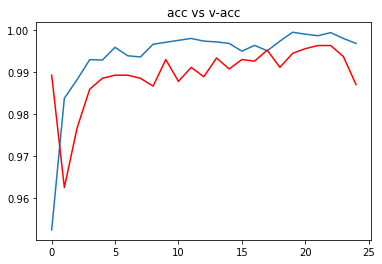

In [40]:
plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'] , c = "red")
plt.title("acc vs v-acc")
plt.show()

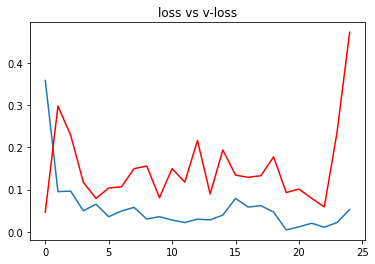

In [41]:
plt.plot(h['loss'])
plt.plot(h['val_loss'] , c = "red")
plt.title("loss vs v-loss")
plt.show()

In [43]:
# just to map o/p values 
op = dict(zip( training_set.class_indices.values(), training_set.class_indices.keys()))

In [44]:
op

{0: 'freshapples',
 1: 'freshbanana',
 2: 'freshoranges',
 3: 'rottenapples',
 4: 'rottenbanana',
 5: 'rottenoranges'}

In [2]:
# Loading the best fit model 
from keras.models import load_model
model = load_model("model_mnet-01-0.989-0.046.h5")

[[4.5296759e-23 6.3214932e-16 2.3466194e-19 1.8846656e-16 1.0000000e+00
  5.7257806e-17]]
4
 the image is of rottenbanana


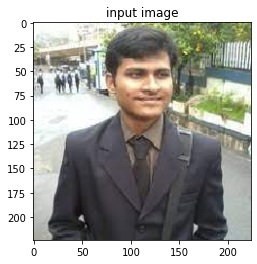

In [59]:
# path for the image to see if it predics correct class
from keras.preprocessing.image import ImageDataGenerator , img_to_array, load_img
path = "."
img = load_img(path, target_size=(224,224) )

i = img_to_array(img)/255
input_arr = np.array([i])
input_arr.shape
print(model.predict(input_arr))
pred = np.argmax(model.predict(input_arr))
print(pred)
print(f" the image is of {op[pred]}")

# to display the image  
plt.imshow(input_arr[0])
plt.title("input image")
plt.show()

In [5]:
import os
import cv2
import numpy as np
from keras.preprocessing import image
import warnings
warnings.filterwarnings("ignore")
from keras.preprocessing.image import load_img, img_to_array 
from keras.models import  load_model
import matplotlib.pyplot as plt
import numpy as np

# load model
model = load_model("model_mnet-01-0.989-0.046.h5")


# face_haar_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')


# cap = cv2.VideoCapture(0)
cap = cv2.VideoCapture('http://192.168.31.194:8080/video')

while True:
    ret, test_img = cap.read()  # captures frame and returns boolean value and captured image
    if not ret:
        continue
    gray_img = cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB)
    
    predictions = model.predict(gray_img)
    max_index = np.argmax(predictions[0])

    emotions = ('freshapples', 'freshbanana', 'freshoranges', 'rottenapples', 'rottenbanana', 'rottenoranges')
    predicted_emotion = emotions[max_index]

    cv2.putText(test_img, predicted_emotion, (int(x), int(y)), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)

#     faces_detected = face_haar_cascade.detectMultiScale(gray_img, 1.32, 5)

#     for (x, y, w, h) in faces_detected:
#         cv2.rectangle(test_img, (x, y), (x + w, y + h), (255, 0, 0), thickness=7)
#         roi_gray = gray_img[y:y + w, x:x + h]  # cropping region of interest i.e. face area from  image
#         roi_gray = cv2.resize(roi_gray, (224, 224))
#         img_pixels = image.img_to_array(roi_gray)
#         img_pixels = np.expand_dims(img_pixels, axis=0)
#         img_pixels /= 255

        

        # find max indexed array
        
    
    cv2.putText(test_img, 'Nitesh', (10, 10), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 255), 2)

    resized_img = cv2.resize(test_img, (1000, 700))
    cv2.imshow('Facial emotion analysis ', resized_img)

    if cv2.waitKey(10) == ord('q'):  # wait until 'q' key is pressed
        break

cap.release()
cv2.destroyAllWindows

ValueError: in user code:

    c:\users\admin\appdata\local\programs\python\python38\lib\site-packages\tensorflow\python\keras\engine\training.py:1478 predict_function  *
        return step_function(self, iterator)
    c:\users\admin\appdata\local\programs\python\python38\lib\site-packages\tensorflow\python\keras\engine\training.py:1468 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    c:\users\admin\appdata\local\programs\python\python38\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1259 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    c:\users\admin\appdata\local\programs\python\python38\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2730 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    c:\users\admin\appdata\local\programs\python\python38\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:3417 _call_for_each_replica
        return fn(*args, **kwargs)
    c:\users\admin\appdata\local\programs\python\python38\lib\site-packages\tensorflow\python\keras\engine\training.py:1461 run_step  **
        outputs = model.predict_step(data)
    c:\users\admin\appdata\local\programs\python\python38\lib\site-packages\tensorflow\python\keras\engine\training.py:1434 predict_step
        return self(x, training=False)
    c:\users\admin\appdata\local\programs\python\python38\lib\site-packages\tensorflow\python\keras\engine\base_layer.py:998 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    c:\users\admin\appdata\local\programs\python\python38\lib\site-packages\tensorflow\python\keras\engine\input_spec.py:271 assert_input_compatibility
        raise ValueError('Input ' + str(input_index) +

    ValueError: Input 0 is incompatible with layer model_1: expected shape=(None, 224, 224, 3), found shape=(None, 1920, 3)


In [ ]:
def object_detection (image):
#       size of image
    (h, w) image.shape[:2]
    blob - cv2.dnn.blobFromImage (cv2.resize(image, (300, 300)), 0.007843, (300, 300), 127.5)
     # pass the blob through the network and obtain the detections and
#      * predictions
    print("(INFO] computing object detections...")
    net.setInput(blob)
    detections - net.forward()
     # loop over the detections
    for i in np.arange (0, detections.shape[2]):
         # extract the confidence (i.e., probability) associated with the
         # prediction
        confidence - detections[0, 0, i, 21]
         # filter out weak detections by ensuring the confidence is
#          greater than the minimum confidence
        if confidence > .60:
             # extract the index of the class label from the detections,
#               then compute the (x, y)-coordinates of the bounding box for
             # the object
            idx = int(detections [0, 0, i, 1])
            box - detections[0, 0, i, 3:7] np.array ([w, h, w, h])
            (startx, startY, endx, endY)=box.astype("int")
#              display the prediction
            label = "{}: (:.2f}8".format (CLASSES[idx], confidence 100)
            print ("[INFO] {}".format(label))
            cv2.rectangle(image, (startx, startY), (endx, endY),COLORS[idx],2)             
            y = startY 15 if startY - 15 > 15 else startY + 15
            cv2.putText (image, label, (startx, y),
                        cv2. FONT_HERSHEY_SIMPLEX, 0.5, COLORS[idx], 2)
    return image